<a href="https://colab.research.google.com/github/MahammadMasood/pandas-works/blob/master/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car.csv to car.csv


In [ ]:
# Import numpy as np & linear algebra
import numpy as np  # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # Setting a default seaborn setting in plots

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list files
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv("car.csv")
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape

(99, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       99 non-null     object 
 1   Year           99 non-null     int64  
 2   Selling_Price  99 non-null     float64
 3   Present_Price  99 non-null     float64
 4   Kms_Driven     99 non-null     int64  
 5   Fuel_Type      99 non-null     object 
 6   Seller_Type    99 non-null     object 
 7   Transmission   99 non-null     object 
 8   Owner          99 non-null     int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 7.1+ KB


In [ ]:
df.isnull().mean()

,0
Car_Name,0.0
Year,0.0
Selling_Price,0.0
Present_Price,0.0
Kms_Driven,0.0
Fuel_Type,0.0
Seller_Type,0.0
Transmission,0.0
Owner,0.0


In [ ]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,99,99.000000,99.000000,99.000000,99.000000,99,99,99,99.000000
unique,25,NaN,NaN,NaN,NaN,3,2,2,NaN
top,corolla altis,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,16,NaN,NaN,NaN,NaN,58,94,76,NaN
mean,NaN,2012.979798,7.513333,13.341818,49096.868687,NaN,NaN,NaN,0.040404
std,NaN,3.380556,6.767819,11.766854,32248.020145,NaN,NaN,NaN,0.316846
min,NaN,2003.000000,0.350000,2.280000,2071.000000,NaN,NaN,NaN,0.000000
25%,NaN,2011.000000,3.300000,6.800000,31214.500000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,4.900000,9.290000,45000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2015.000000,7.625000,18.575000,58621.000000,NaN,NaN,NaN,0.000000


In [ ]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,99,99,99,99
unique,25,3,2,2
top,corolla altis,Petrol,Dealer,Manual
freq,16,58,94,76


In [ ]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [ ]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

/tmp/ipython-input-1475824536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Year)


<Axes: xlabel='Year', ylabel='Density'>

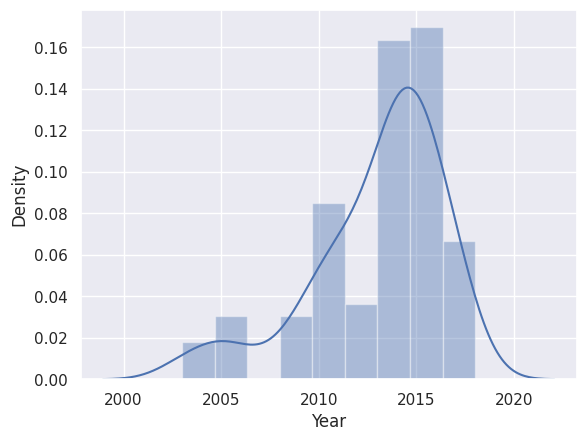

In [ ]:
sns.distplot(df.Year)

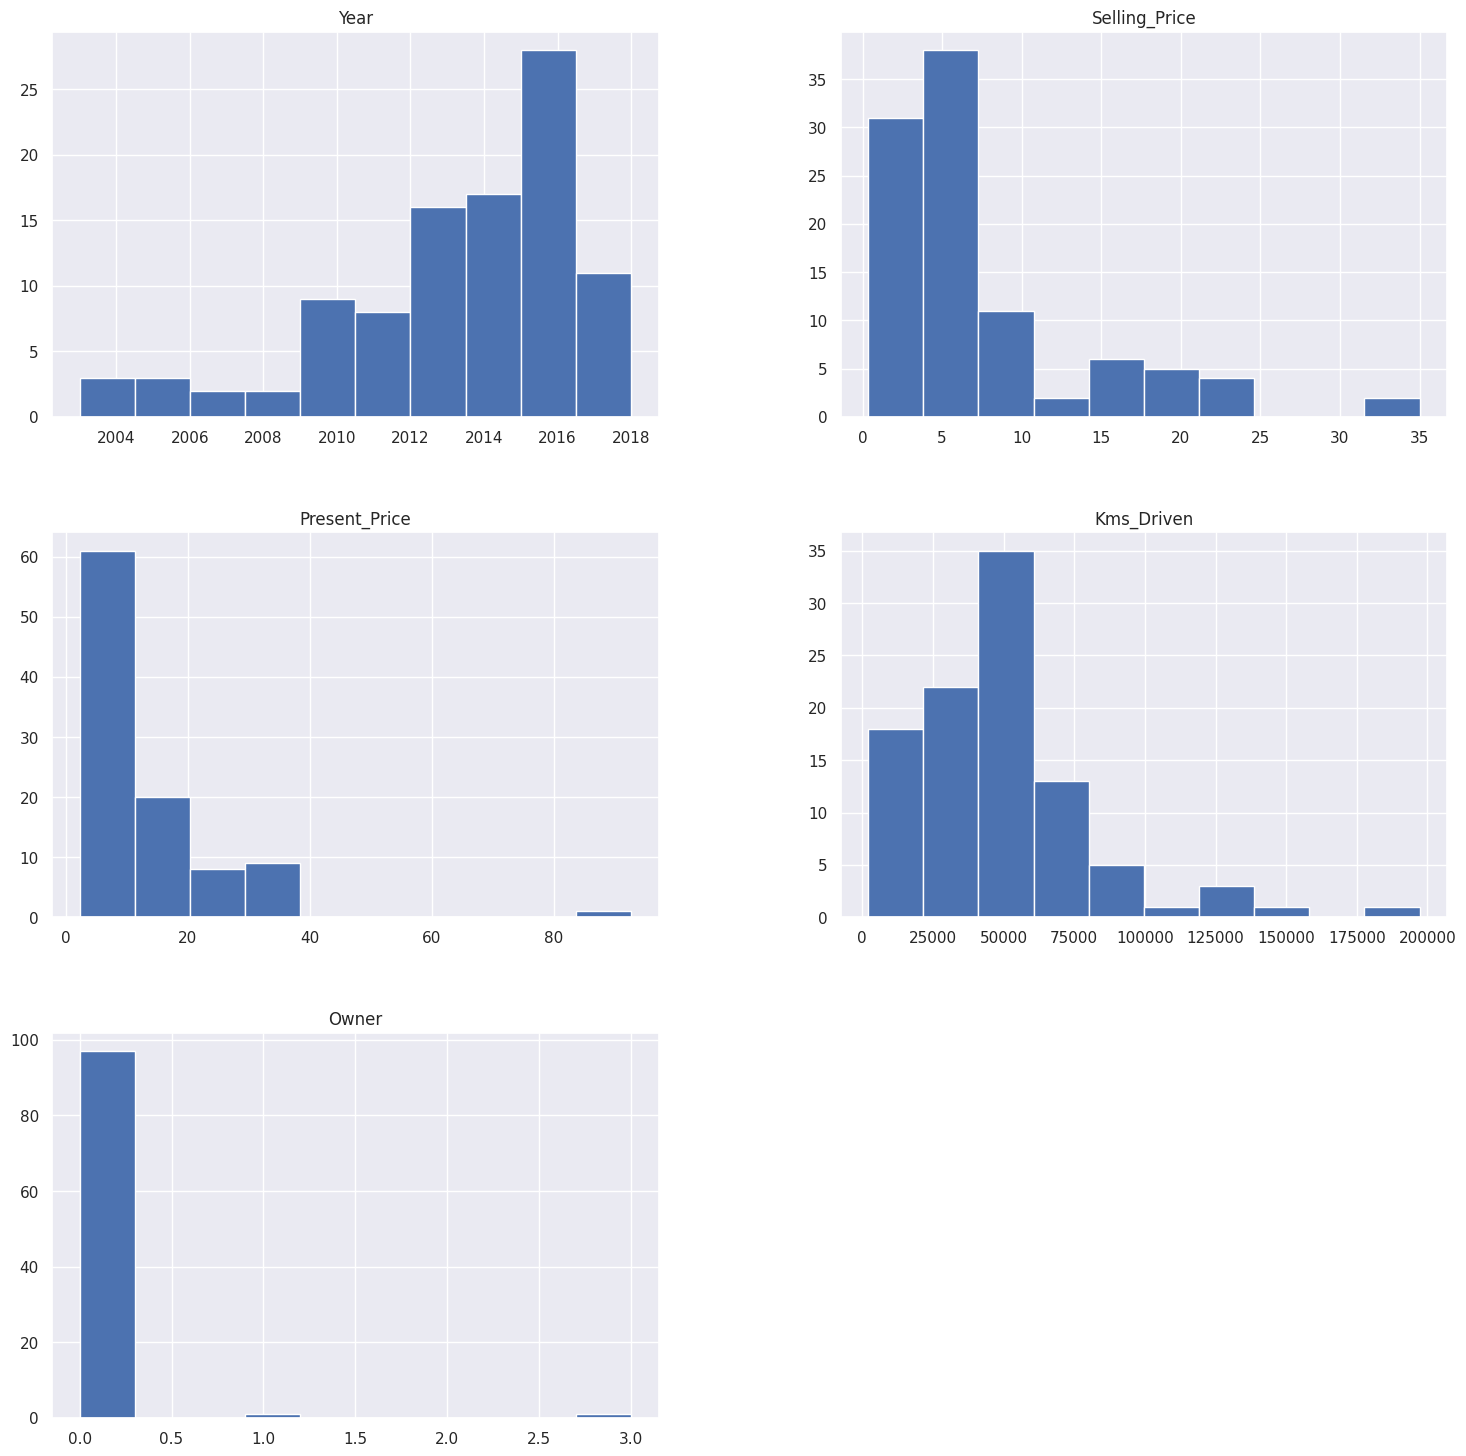

In [ ]:
fig=df.hist(figsize=(18,18))

/tmp/ipython-input-3808127424.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Seller_Type',y='Selling_Price',data=df,palette='twilight')


<Axes: xlabel='Seller_Type', ylabel='Selling_Price'>

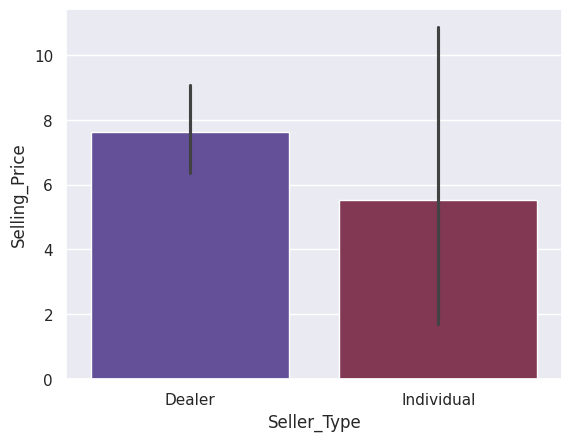

In [ ]:
sns.barplot(x='Seller_Type',y='Selling_Price',data=df,palette='twilight')

/tmp/ipython-input-1725234513.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fuel_Type',y='Selling_Price',data=df,palette='twilight')


<Axes: xlabel='Fuel_Type', ylabel='Selling_Price'>

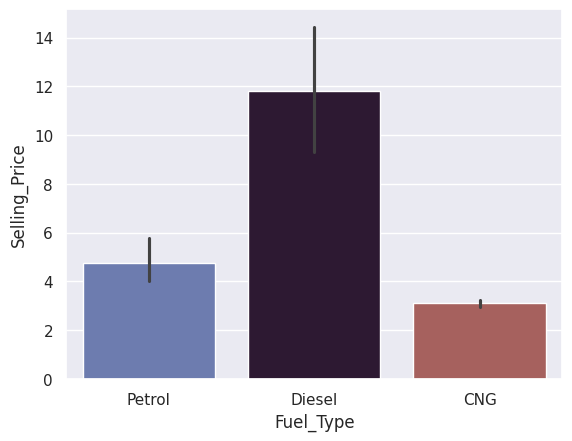

In [ ]:
sns.barplot(x='Fuel_Type',y='Selling_Price',data=df,palette='twilight')

<Axes: xlabel='Selling_Price', ylabel='Year'>

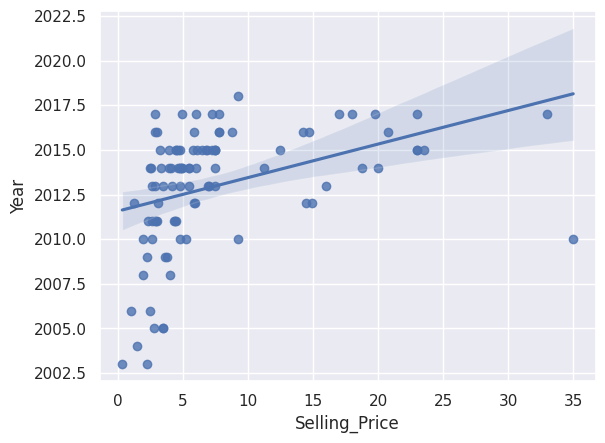

In [ ]:
sns.regplot(x='Selling_Price',y='Year',data=df)

<Axes: xlabel='Selling_Price', ylabel='Kms_Driven'>

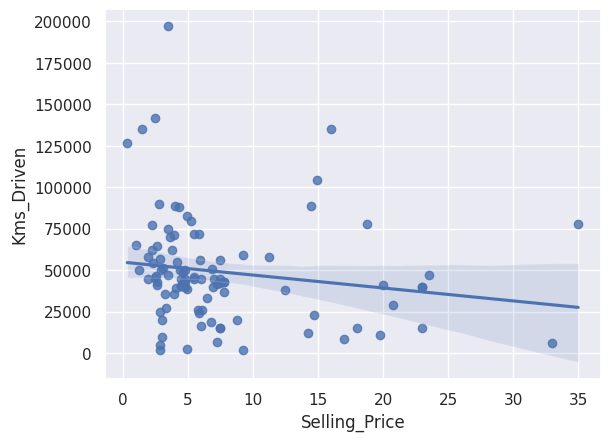

In [ ]:
sns.regplot(x='Selling_Price',y='Kms_Driven',data=df)

/tmp/ipython-input-2850825126.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Transmission',y='Selling_Price',data=df,palette='spring')


<Axes: xlabel='Transmission', ylabel='Selling_Price'>

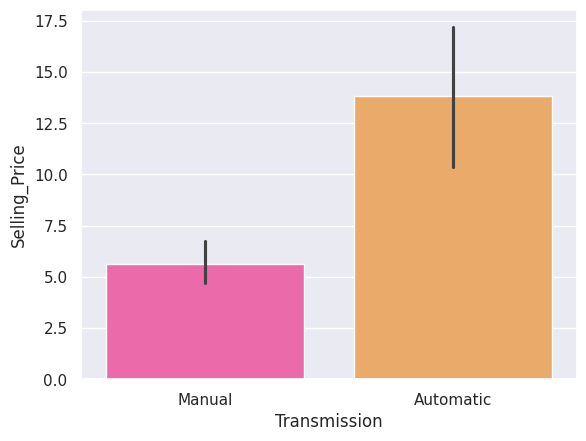

In [ ]:
sns.barplot(x='Transmission',y='Selling_Price',data=df,palette='spring')

/tmp/ipython-input-471597317.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Owner',y='Selling_Price',data=df,palette='ocean')


<Axes: xlabel='Owner', ylabel='Selling_Price'>

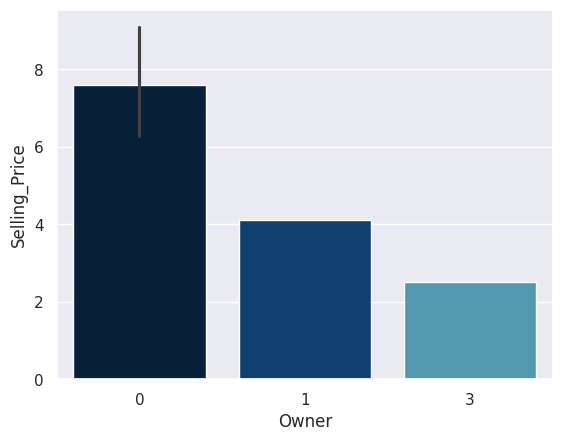

In [ ]:
sns.barplot(x='Owner',y='Selling_Price',data=df,palette='ocean')

In [ ]:
def plot_categorical(feature, dataset):
    ax = sns.countplot(y=feature, data=dataset)
    plt.title('Distribution of ' + feature)
    plt.xlabel('Count')

    total = len(dataset[feature])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))

    plt.show()


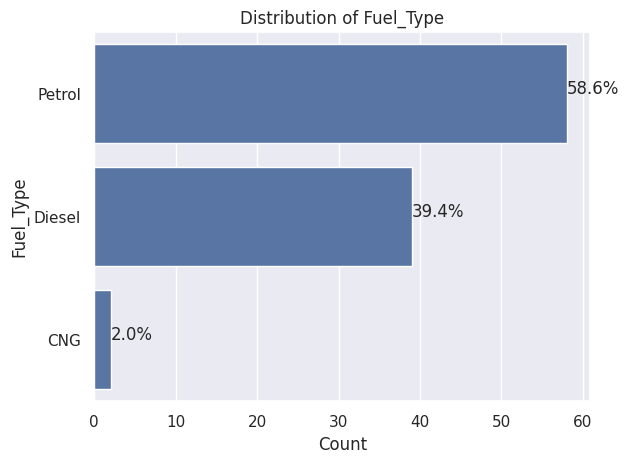

In [ ]:
plot_categorical('Fuel_Type',df)

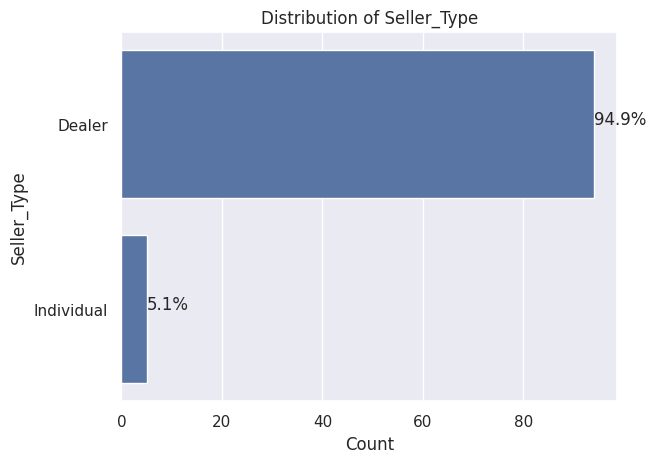

In [ ]:
plot_categorical('Seller_Type',df)

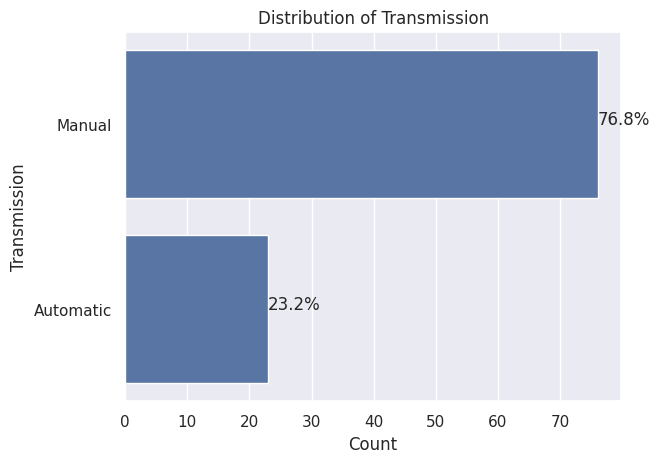

In [ ]:
plot_categorical('Transmission',df)

# New Section